# Practical 1

### Link
https://courses.cs.ox.ac.uk/pluginfile.php/14000/course/section/1444/practical1.pdf

In [19]:
import _pickle as cp
import matplotlib.pyplot as plt
import numpy as np
X, y = cp.load(open('winequality-white.pickle', 'rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (4898, 11)
y shape: (4898,)


## Handin 1: plotting y

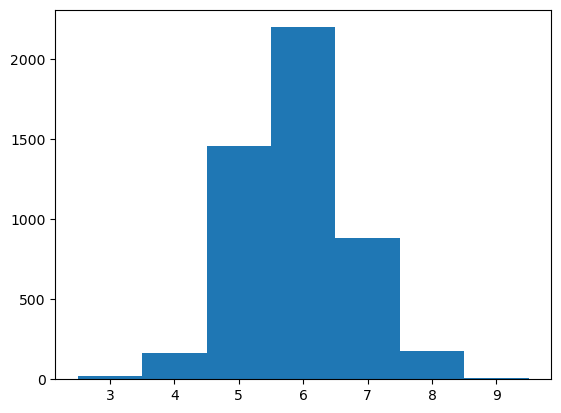

In [16]:
plt.hist(y, bins=np.arange(2.5,10.5,1))
plt.show()

## Handin 2: Finding the MSE (Mean Squared Error)

In [42]:
# First find the mean
meany = np.average(y_train)
print(f"Mean: {meany}")

def mse(predicted, expected):
    diffs = predicted - expected
    squared = np.square(diffs)
    avg = np.average(squared)
    return avg
# then calculate the sum of squared differences from the mean
# diffs_train = y_train - meany
# diffs_test = y_test - meany
# # print(f"Diffs: train {diffs_train} -- test {diffs_test}")
# diffs_squared_train = np.square(diffs_train)
# diffs_squared_test = np.square(diffs_test)
# # print(f"Diffs squared: train {diffs_squared_train} -- test {diffs_squared_test}")
# avg_diffs_squared_train = np.average(diffs_squared_train)
# avg_diffs_squared_test = np.average(diffs_squared_test)
print(f"Average Sum Diffs Squared: train {mse(y_train, meany)} -- test {mse(y_test, meany)}")

Mean: 5.878764675855028
Average Sum Diffs Squared: train 0.7767772386501117 -- test 0.8138573000045535


## Handin 3: Standardizing Dataset and Finding Least Squares Regression

In [58]:
def find_standardize_params(matrix):
    mean = np.average(matrix, axis=0)
    std = np.std(matrix, axis=0)
    return mean, std

def standardize(mat, params):
    mean, std = params
    return (mat - mean) / std

# add bias all ones to X's
def addBias(matrix):
    bias = np.ones((matrix.shape[0], 1))
    return np.hstack((matrix, bias))


test = np.arange(1,10).reshape((3,3))
print(test)
params = find_standardize_params(test)
standardize(test, params)
print(addBias(test))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3. 1.]
 [4. 5. 6. 1.]
 [7. 8. 9. 1.]]


In [89]:
# meanX = np.average(X_train, axis=0)
# print(meanX.shape)
# stddev_X = np.std(X_train, axis=0)
# stddev_y = np.std(y_train)

# std_X_train = (X_train - meanX) / stddev_X
# std_X_test = (X_test - meanX) / stddev_X
# std_y_train = (X_train - meany) / stddev_y
# std_y_test = (X_test - meany) / stddev_y

# print(std_X_train)
# print(std_y_train)

# standardize all train and test data (using the train data for mean and std)
stdparamsX = find_standardize_params(X_train)
std_X_train = standardize(X_train, stdparamsX)
std_X_test = standardize(X_test, stdparamsX)

# stdparamsy = find_standardize_params(y_train)
# std_y_train = standardize(y_train, stdparamsy)
# std_y_test = standardize(y_test, stdparamsy)

std_X_train_wbias = addBias(std_X_train)
std_X_test_wbias = addBias(std_X_test)

# least squares prediction
# y_pred = Xw = X((X_TX)^-1)X_Ty
# my mistake was standardizing the features X and response y when I don't have have to standardized y (response)
w = (np.linalg.inv(std_X_train_wbias.transpose() @ std_X_train_wbias) @ std_X_train_wbias.transpose()) @ y_train
y_pred_train = std_X_train_wbias @ w
y_pred_test = std_X_test_wbias @ w

# print(y_pred_train)

print(f"MSE: train {mse(y_pred_train, y_train)} -- test {mse(y_pred_test, y_test)}")
# print(np.mean(np.square(y_train - y_pred_train)))
# print(np.mean(np.square(y_test - y_pred_test)))

MSE: train 0.5639996173941925 -- test 0.5607292042283468


## Handin 4: Learning curves

> Let us see if the linear model is overfitting or underfitting. Since the dataset is somewhat large
and there are only 11 features, our guess should be that it may either be underfitting or be
about right.
Starting with 20 datapoints, we’ll use training datasets of increasing size, in increments of 20,
up to about 600 datapoints. For each case train the linear model only using the first n elements
of the training data. Calculate the training error (on the data used) and the test error (on the
full test set). Plot the training error and test error as a function of the size of the dataset used
for training.
Handin 4: Report the learning curves plot. Also, explain whether you think the model is
underfitting or not, and how much data you need before getting the optimal test error.

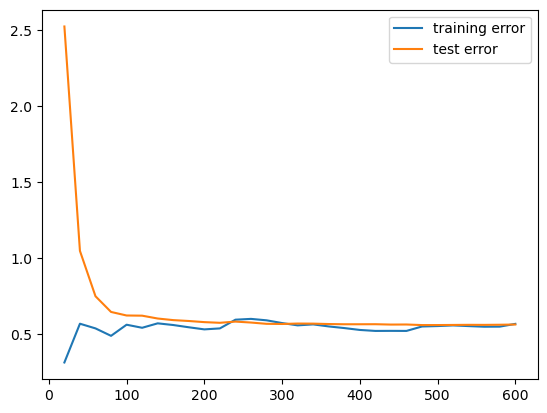

In [103]:
# on the set used to train
training_errors = []
# on the full test set
test_errors = []

sizes = [size for size in range(20, 620, 20)]

# returns the vector of weights from least squares regression
def train(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

for size in sizes:
    # get the size of data we want to work with
    features = std_X_train_wbias[:size, :]
    response = y_train[:size]

    # calculate the best weights
    w = train(features, response)
    # print(w)
    # find the training error
    y_train_pred = features @ w
    training_errors.append(mse(y_train_pred, response))

    # find the test error
    y_test_pred = std_X_test_wbias @ w
    # print(y_test_pred)
    test_errors.append(mse(y_test_pred, y_test))

    # print(features.shape, response.shape)

# plot both train and test learning curves
plt.plot(sizes, training_errors, label = "training error")
plt.plot(sizes, test_errors, label = "test error")
plt.legend()
plt.show()

# print(training_errors)
# print(test_errors)


#### Final Qs:
> explain whether you think the model is underfitting or not, and how much data you need before getting the optimal test error.

The model is definitely not overfitting because test error is staying down with train error. I don't think the model is underfitting either because it isn't doing worse on more data, it appears to have plateaued at a min-test MSE.